In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop_duplicates()
data = data.reset_index(drop = True)
display(data)

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

In [2]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [3]:
def the_perfect_plot(df):
    #standardize headers
    cols = []
    for col in df.columns:
        cols.append(col.lower().replace(' ', '_'))
    df.columns = cols
    #Rounding up total claim amount and customer lifetime value columns to 2 decimals
    df['total_claim_amount'] = df['total_claim_amount'].round(decimals = 2)
    df['customer_lifetime_value'] = df['customer_lifetime_value'].round(decimals = 2)
    #Displaying Df info
    print("This is the dataframe info: \n")
    display(data.info())
    #Describe Df
    print("This is the dataframe description: \n")
    display(df.describe())
    #Show a plot of the total number of responses.
    print("Plot showing total number of responses") 
    fig, ax = plt.subplots()
    ax.scatter(x=(data['response'] == 'Yes').sum(), y=len(data['response']))
    ax.set_xlabel('Responses')
    ax.set_ylabel('Calls')
    ax.set_title('Total number of responses')
    return df


This is the dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_au

None

This is the dataframe description: 



customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940473  37657.380009             93.219291   
std                6870.967599  30379.904734             34.407967   
min                1898.010000      0.000000             61.000000   
25%                3994.250000      0.000000             68.000000   
50%                5780.180000  33889.500000             83.000000   
75%                8962.170000  62320.000000            109.000000   
max               83325.380000  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088834  
std                     0.910384            2.390182          290.500043  
min                     0.000000            1.000000            0.100000  
25%                     0.000000            1.000000          272.260000  
50%                     0.000000            2.000000          383.945000  
75%                     0.000000            4.000000          547.515000  
max                     5.000000            9.000000         2893.240000

Plot showing total number of responses


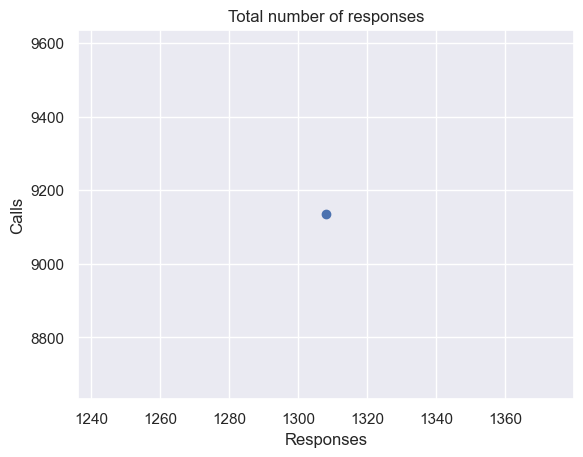

In [4]:
data = the_perfect_plot(data)

**Calculate rates**

Number of responses (Yes VS No)

14.32
85.68


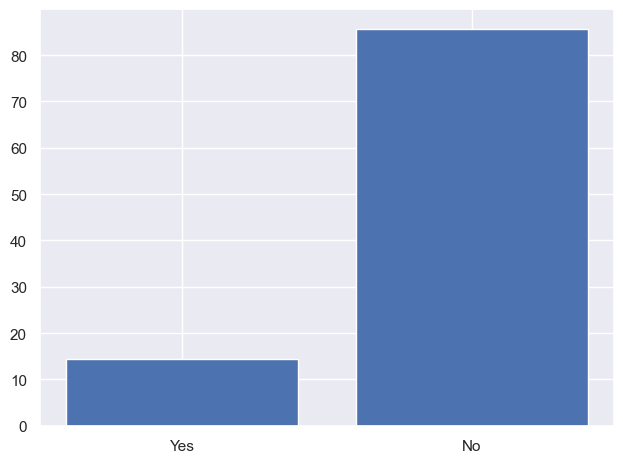

In [5]:
rate_response_yes = round((data['response'] == 'Yes').sum()/data.shape[0]*100, 2)
rate_response_no = round((data['response'] == 'No').sum()/data.shape[0]*100, 2)

response_y = [rate_response_yes, rate_response_no]
response_tag = ['Yes', 'No']

print(rate_response_yes)
print(rate_response_no)

plt.bar(response_tag, response_y)
plt.tight_layout()
plt.show()

In [6]:
rate_channel_agent = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Agent').sum()*100, 2)
rate_channel_call_center = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Call Center').sum()*100, 2)
rate_channel_web = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Web').sum()*100, 2)
rate_channel_branch = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Branch').sum()*100, 2)
rate_channel = [rate_channel_agent, rate_channel_call_center, rate_channel_web, rate_channel_branch]
rate_channel_tag = ['agent', 'call center', 'web', 'branch']

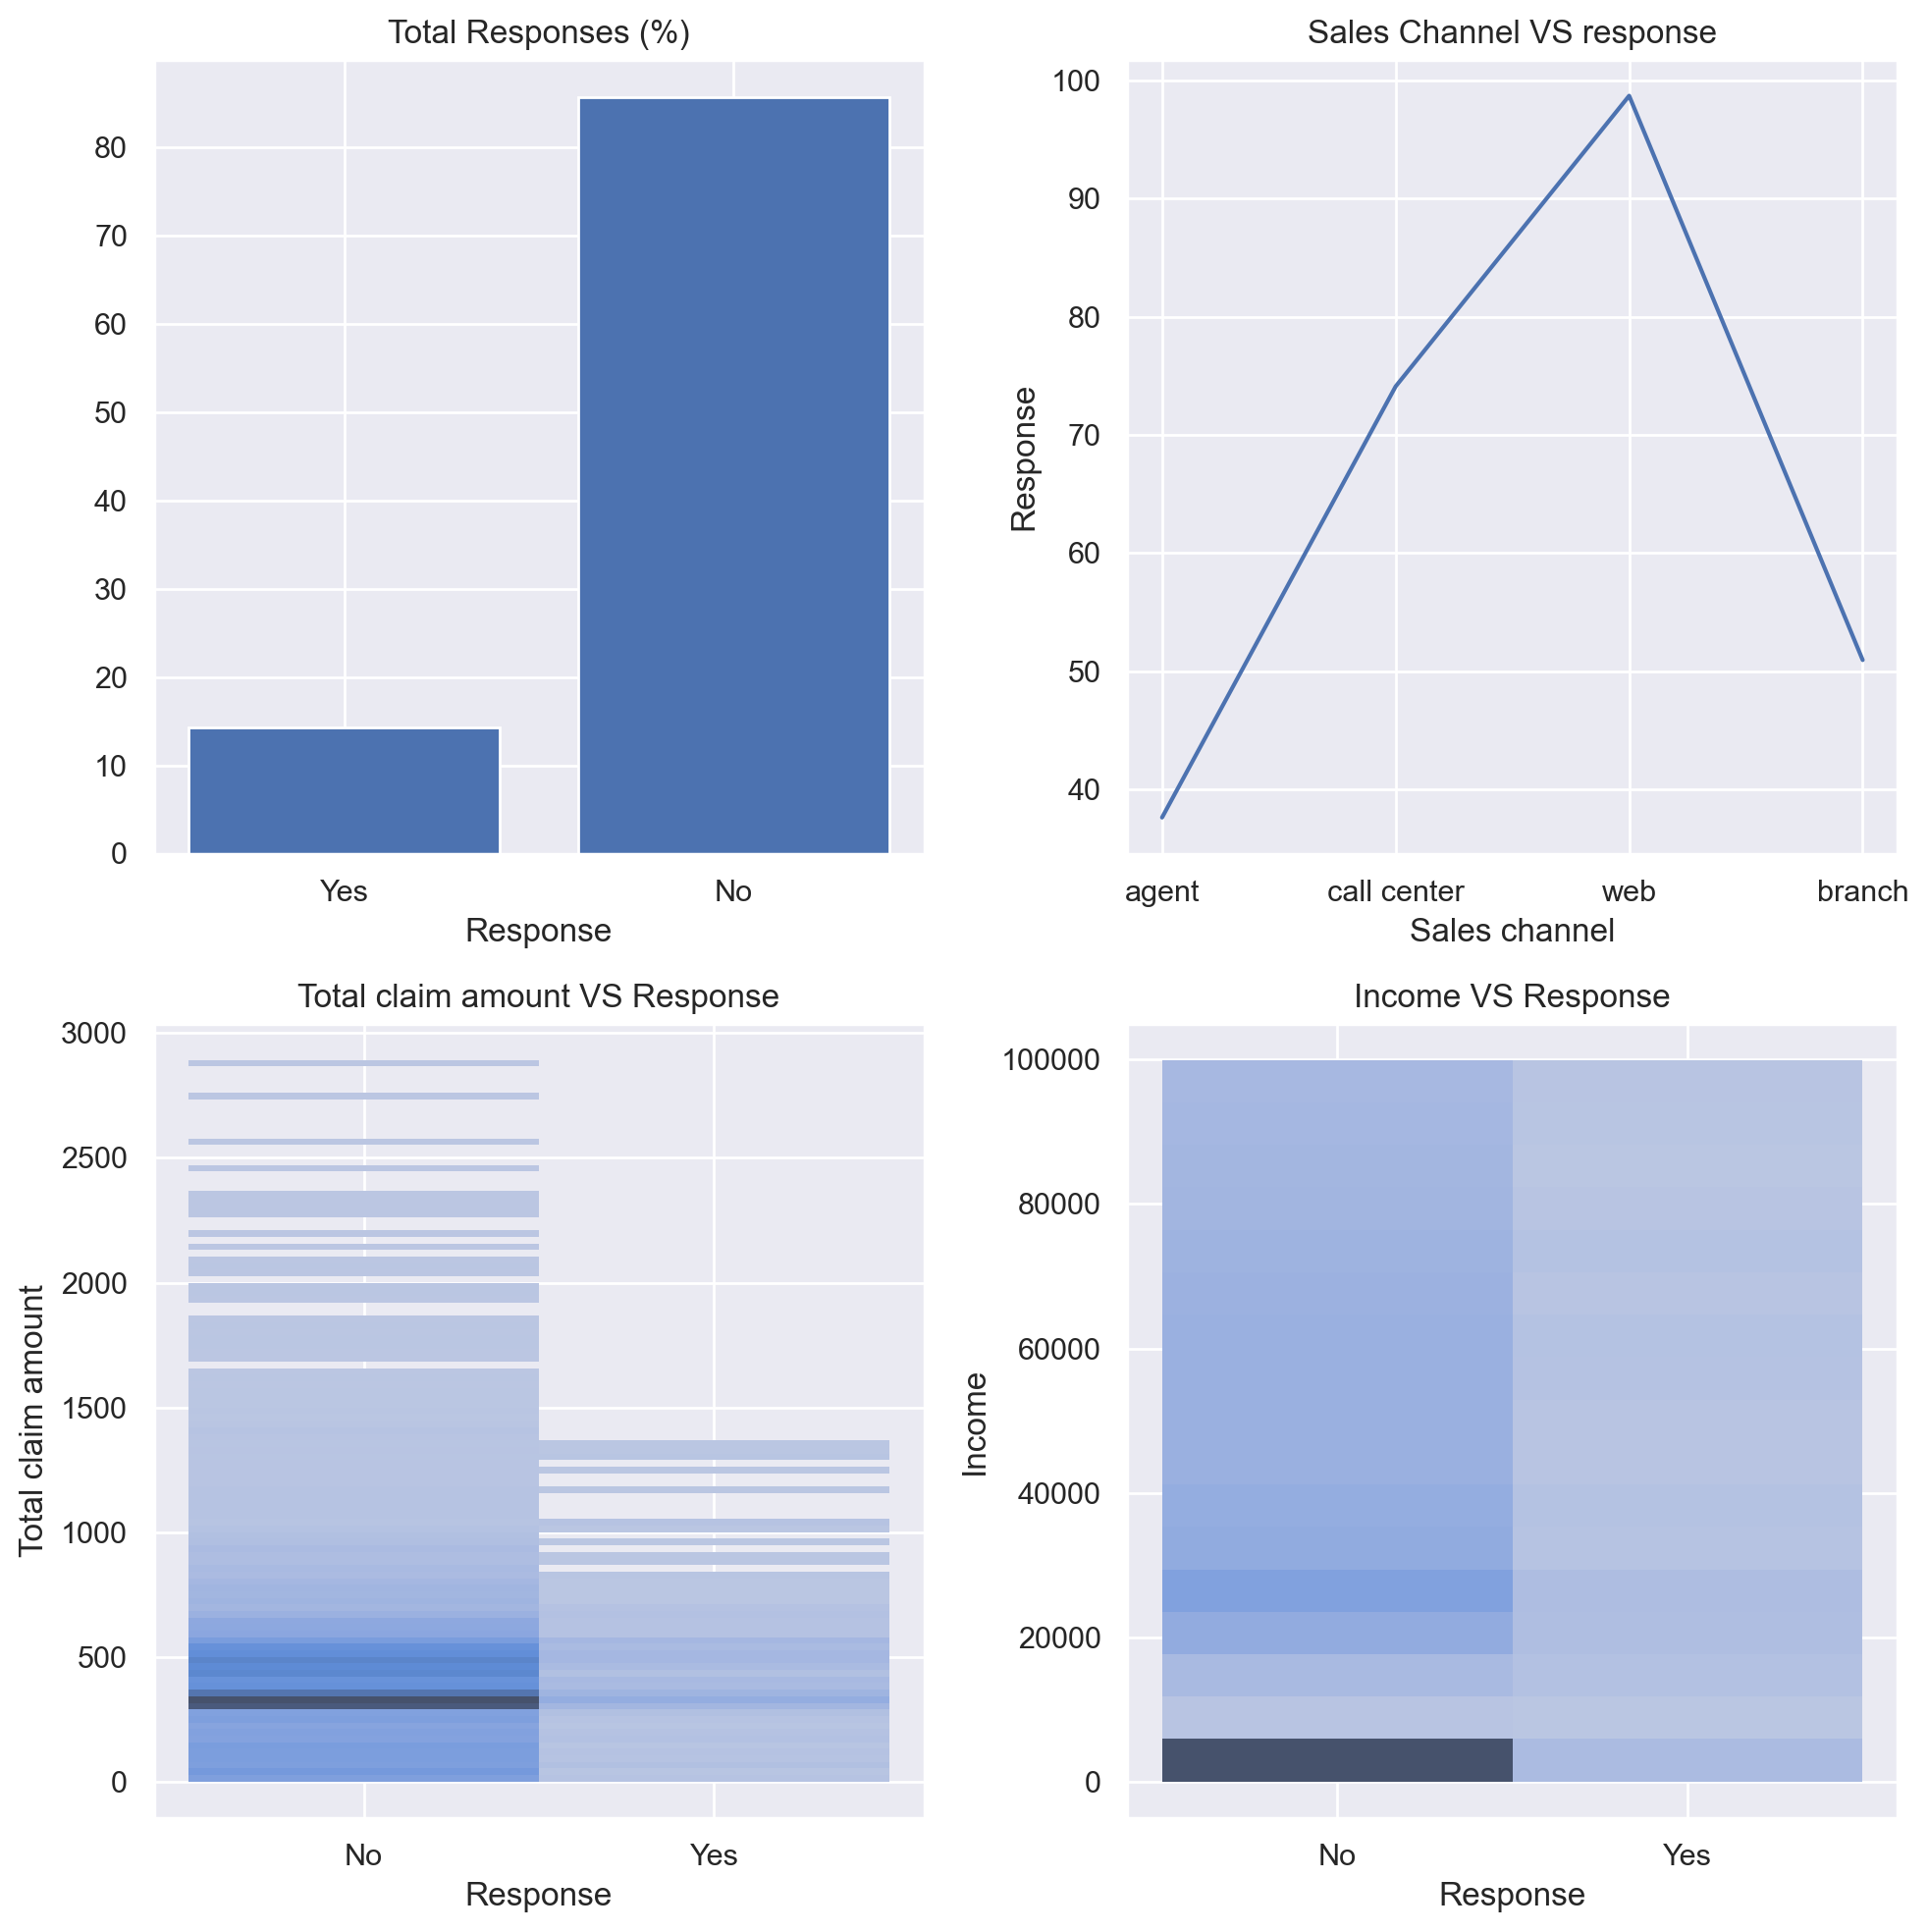

In [7]:
fig, axes = plt.subplots(2,2, figsize=(10,10), dpi=200)
#Total responses
axes[0,0].bar(response_tag, response_y)
axes[0,0].set_xlabel('Response')
axes[0,0].set_title('Total Responses (%)')
#Sales channel VS response
axes[0,1].plot(rate_channel_tag, rate_channel)
axes[0,1].set_xlabel('Sales channel')
axes[0,1].set_ylabel('Response')
axes[0,1].set_title('Sales Channel VS response')
#sns.histplot(data = data, x='sales_channel', y='response', ax = axes[0,1])
#Total claim amount VS Response
sns.histplot(data = data, x='response', y='total_claim_amount', ax = axes[1,0])
axes[1,0].set_xlabel('Response')
axes[1,0].set_ylabel('Total claim amount')
axes[1,0].set_title('Total claim amount VS Response')
sns.histplot(data = data, x='response', y='income', ax = axes[1,1])
axes[1,1].set_xlabel('Response')
axes[1,1].set_ylabel('Income')
axes[1,1].set_title('Income VS Response')
plt.tight_layout()

In [8]:
print(rate_channel_agent)
print(rate_channel_call_center)
print(rate_channel_web)
print(rate_channel_branch)

37.62
74.11
98.72
50.95


In [9]:
rate_channel_response = data[['sales_channel', 'response']].copy()
agent_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Agent']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
call_center_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Call Center']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
web_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Web']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
branch_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Branch']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
channel_freq = [agent_yes, call_center_yes, web_yes, branch_yes]

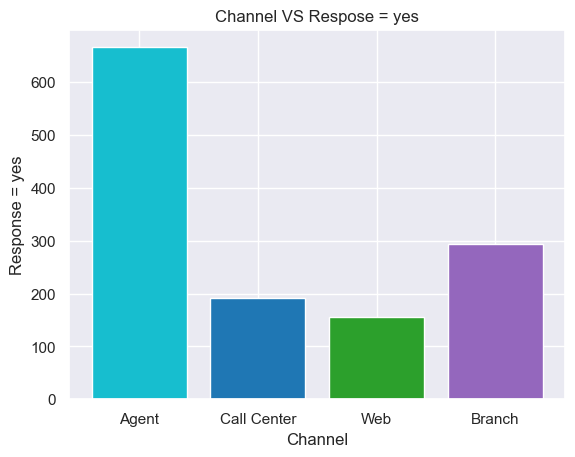

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
channel_tag = ['Agent', 'Call Center', 'Web', 'Branch']
counts = [40, 100, 30, 55]
bar_colors = ['tab:cyan', 'tab:blue', 'tab:green', 'tab:purple']
ax.bar(channel_tag, channel_freq, color=bar_colors)
ax.set_xlabel('Channel')
ax.set_ylabel('Response = yes')
ax.set_title('Channel VS Respose = yes')

plt.show()

In [11]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [12]:
agent_yes+ call_center_yes+ web_yes+branch_yes

1308

There is a considerable differnece between the conversion of agents VS the conversion of the Web channels.
Although the web channel arrives to more people, it has the lowest conversion rate, while the agents channel is the most effective (with more sales and less contacts).

**Total claim amount VS response**

In [13]:
tcr = data[['total_claim_amount', 'response']].copy()
tcr

total_claim_amount response
0                 384.81       No
1                1131.46       No
2                 566.47       No
3                 529.88       No
4                 138.13       No
...                  ...      ...
9129              198.23       No
9130              379.20      Yes
9131              790.78       No
9132              691.20       No
9133              369.60       No

[9134 rows x 2 columns]

In [14]:
tcr['total_claim_amount'].max()

2893.24

In [15]:
tcr['total_claim_amount'].min()

0.1

In [16]:
claim_1_yes = tcr[(tcr['total_claim_amount']<500) & tcr['response'].isin(['Yes'])].count()[1]
claim_2_yes = tcr[(tcr['total_claim_amount']>500)&(tcr['total_claim_amount']<1000) & tcr['response'].isin(['Yes'])].count()[1]
claim_3_yes = tcr[(tcr['total_claim_amount']>1000)&(tcr['total_claim_amount']<1500) & tcr['response'].isin(['Yes'])].count()[1]
claim_4_yes = tcr[(tcr['total_claim_amount']>1500)&(tcr['total_claim_amount']<2000) & tcr['response'].isin(['Yes'])].count()[1]
claim_5_yes = tcr[(tcr['total_claim_amount']>2000)&(tcr['total_claim_amount']<2500) & tcr['response'].isin(['Yes'])].count()[1]
claim_6_yes = tcr[(tcr['total_claim_amount']>2500)&(tcr['total_claim_amount']<3000) & tcr['response'].isin(['Yes'])].count()[1]

In [17]:
claim_1_no = tcr[(tcr['total_claim_amount']<500) & tcr['response'].isin(['No'])].count()[1]
claim_2_no = tcr[(tcr['total_claim_amount']>500)&(tcr['total_claim_amount']<1000) & tcr['response'].isin(['No'])].count()[1]
claim_3_no = tcr[(tcr['total_claim_amount']>1000)&(tcr['total_claim_amount']<1500) & tcr['response'].isin(['No'])].count()[1]
claim_4_no = tcr[(tcr['total_claim_amount']>1500)&(tcr['total_claim_amount']<2000) & tcr['response'].isin(['No'])].count()[1]
claim_5_no = tcr[(tcr['total_claim_amount']>2000)&(tcr['total_claim_amount']<2500) & tcr['response'].isin(['No'])].count()[1]
claim_6_no = tcr[(tcr['total_claim_amount']>2500)&(tcr['total_claim_amount']<3000) & tcr['response'].isin(['No'])].count()[1]

In [18]:
claim_yes = [claim_1_yes, claim_2_yes, claim_3_yes, claim_4_yes, claim_5_yes, claim_6_yes]
claim_no = [claim_1_no, claim_2_no, claim_3_no, claim_4_no, claim_5_no, claim_6_no]
total_claims = 0
for i in claim_yes:
    total_claims += i
for i in claim_no:
    total_claims += i
total_claims

9134

Text(0.5, 1.0, 'Claim amount VS response = No')

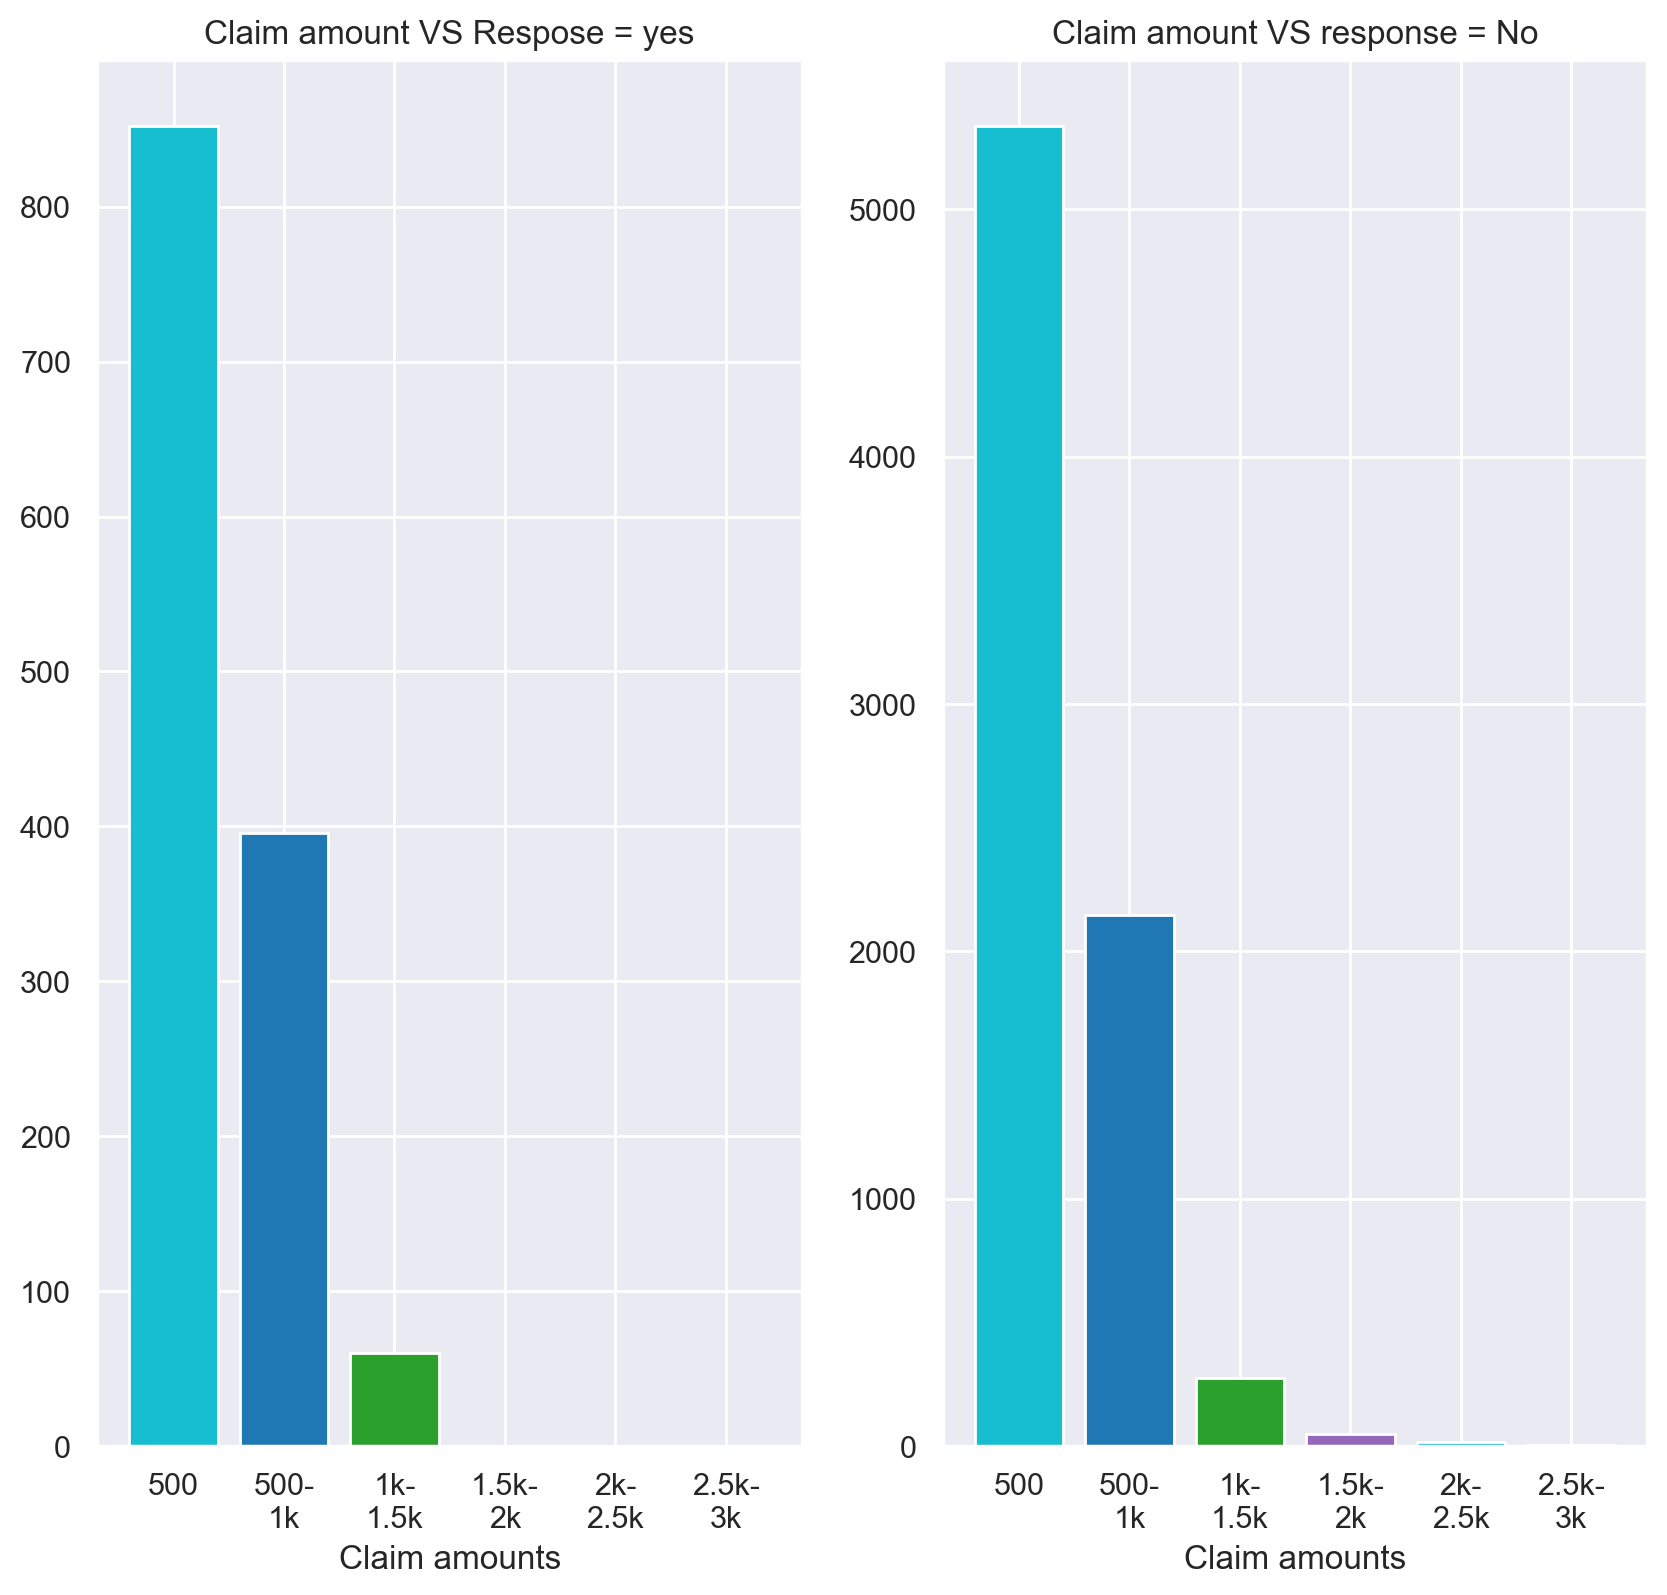

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,9), dpi=200)
claim_amount = ['500', '500-\n1k', '1k-\n1.5k', '1.5k-\n2k', '2k-\n2.5k', '2.5k-\n3k']
#Total responses
axes[0].bar(claim_amount, claim_yes, color=bar_colors)
axes[0].set_xlabel('Claim amounts')
axes[0].set_title('Claim amount VS Respose = yes')
#Sales channel VS response
axes[1].bar(claim_amount, claim_no, color=bar_colors)
axes[1].set_xlabel('Claim amounts')
axes[1].set_title('Claim amount VS response = No')
#sns.histplot(data = data, x='sales_channel', y='response', ax = axes[0,1])
#Total claim amount VS Response